# Depression Classification Model


# Decision tree Algorithm :
A decision tree is a popular machine learning algorithm used for classification tasks, including depression classification. When applied to a dataset for depression classification, a decision tree algorithm can provide insights into the relationships between various features (such as age, gender, stress level, sleep hours, education level, etc.) and the likelihood of an individual being classified as having depression or not.


#pip install scikit-learn matplotlib


In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
#Loading the dataset
df = pd.read_csv('final.csv')

In [3]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Employment Status',
       'Family History of Depression', 'Stress Level', 'Sleep Hours',
       'Number of Social Interactions', 'Physical Activity', 'Mood Score',
       'phq_score [PHQ-9]', 'gad_score [GAD-7]', 'Unnamed: 12'],
      dtype='object')

In [4]:
df.head(10)

,Age,Gender,Education Level,Employment Status,Family History of Depression,Stress Level,Sleep Hours,Number of Social Interactions,Physical Activity,Mood Score,phq_score [PHQ-9],gad_score [GAD-7],Unnamed: 12
0,62.0,Male,Bachelor,Unemployed,No,0.170650,7.0,3.0,2.0,7.651882,11.0,10.0,NaN
1,18.0,Female,Ph.D.,Unemployed,Yes,0.620737,4.0,1.0,1.0,2.025711,23.0,14.0,NaN
2,21.0,Female,Ph.D.,Unemployed,Yes,0.412697,7.0,9.0,1.0,1.300640,0.0,14.0,NaN
3,21.0,Male,Master,Employed,No,0.409237,4.0,4.0,2.0,5.607167,27.0,15.0,NaN
4,57.0,Female,High School,Unemployed,No,0.145520,6.0,6.0,0.0,1.300060,16.0,10.0,NaN
5,27.0,Male,Ph.D.,Student,Yes,0.001865,4.0,3.0,1.0,7.563604,15.0,9.0,NaN
6,37.0,Male,Master,Employed,No,0.972120,4.0,8.0,0.0,5.697635,9.0,4.0,NaN
7,39.0,Female,High School,Student,No,0.251944,4.0,2.0,1.0,5.229995,4.0,18.0,NaN
8,54.0,Male,Master,Employed,No,0.710113,6.0,9.0,1.0,3.932636,13.0,13.0,NaN
9,41.0,Male,Bachelor,Unemployed,Yes,0.214553,6.0,1.0,4.0,6.695255,14.0,0.0,NaN


In [144]:
df.shape

(5002, 13)

In [6]:
#data preprocessing
df[df.isnull().any(axis=1)].head()

,Age,Gender,Education Level,Employment Status,Family History of Depression,Stress Level,Sleep Hours,Number of Social Interactions,Physical Activity,Mood Score,phq_score [PHQ-9],gad_score [GAD-7],Unnamed: 12
0,62.0,Male,Bachelor,Unemployed,No,0.170650,7.0,3.0,2.0,7.651882,11.0,10.0,NaN
1,18.0,Female,Ph.D.,Unemployed,Yes,0.620737,4.0,1.0,1.0,2.025711,23.0,14.0,NaN
2,21.0,Female,Ph.D.,Unemployed,Yes,0.412697,7.0,9.0,1.0,1.300640,0.0,14.0,NaN
3,21.0,Male,Master,Employed,No,0.409237,4.0,4.0,2.0,5.607167,27.0,15.0,NaN
4,57.0,Female,High School,Unemployed,No,0.145520,6.0,6.0,0.0,1.300060,16.0,10.0,NaN


In [7]:
del df['Unnamed: 12']

In [8]:
df.head(5)

,Age,Gender,Education Level,Employment Status,Family History of Depression,Stress Level,Sleep Hours,Number of Social Interactions,Physical Activity,Mood Score,phq_score [PHQ-9],gad_score [GAD-7]
0,62.0,Male,Bachelor,Unemployed,No,0.170650,7.0,3.0,2.0,7.651882,11.0,10.0
1,18.0,Female,Ph.D.,Unemployed,Yes,0.620737,4.0,1.0,1.0,2.025711,23.0,14.0
2,21.0,Female,Ph.D.,Unemployed,Yes,0.412697,7.0,9.0,1.0,1.300640,0.0,14.0
3,21.0,Male,Master,Employed,No,0.409237,4.0,4.0,2.0,5.607167,27.0,15.0
4,57.0,Female,High School,Unemployed,No,0.145520,6.0,6.0,0.0,1.300060,16.0,10.0


In [148]:
df.shape

(5002, 12)

In [9]:
#creating copy of dataset
clean_data=df.copy()


In [10]:
clean_data.head(5)

,Age,Gender,Education Level,Employment Status,Family History of Depression,Stress Level,Sleep Hours,Number of Social Interactions,Physical Activity,Mood Score,phq_score [PHQ-9],gad_score [GAD-7]
0,62.0,Male,Bachelor,Unemployed,No,0.170650,7.0,3.0,2.0,7.651882,11.0,10.0
1,18.0,Female,Ph.D.,Unemployed,Yes,0.620737,4.0,1.0,1.0,2.025711,23.0,14.0
2,21.0,Female,Ph.D.,Unemployed,Yes,0.412697,7.0,9.0,1.0,1.300640,0.0,14.0
3,21.0,Male,Master,Employed,No,0.409237,4.0,4.0,2.0,5.607167,27.0,15.0
4,57.0,Female,High School,Unemployed,No,0.145520,6.0,6.0,0.0,1.300060,16.0,10.0


In [98]:
clean_data['severe_depression_label'] = ((clean_data['phq_score [PHQ-9]'] >=12) & (clean_data['gad_score [GAD-7]'] >=8) & (clean_data['Physical Activity'] <=5))*1
clean_data[ 'severe_depression_label'].head()

0    0
1    1
2    0
3    1
4    1
Name: severe_depression_label, dtype: int32

In [99]:
#creating target variable for data modelling
y=clean_data[['severe_depression_label']].copy()
y.head()

,severe_depression_label
0,0
1,1
2,0
3,1
4,1


In [100]:
features=['Age', 'Gender', 'Education Level', 'Employment Status',
       'Family History of Depression', 'Stress Level', 'Sleep Hours',
       'Number of Social Interactions', 'Mood Score']

In [101]:
X=clean_data[features]
X.head()
X.columns

Index(['Age', 'Gender', 'Education Level', 'Employment Status',
       'Family History of Depression', 'Stress Level', 'Sleep Hours',
       'Number of Social Interactions', 'Mood Score'],
      dtype='object')

#Now we have all independent features in x and dependent features in y

In [102]:
# Performing one-hot encoding for categorical columns
categorical_columns = ['Gender', 'Education Level', 'Employment Status', 'Family History of Depression']
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Model training and testing

In [104]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.35, random_state=42)


In [157]:
#creating classifier to train data using this and to make the decession tree

In [105]:
dt_model = DecisionTreeClassifier(max_leaf_nodes=8,max_depth=9,random_state=0)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=9, max_leaf_nodes=8, random_state=0)

In [106]:
#Making predictions on the test set
y_pred = dt_model.predict(X_test)

In [107]:
#Evaluation of the performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy : {accuracy*100:.2f}%")

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.99      0.78      1131
           1       0.38      0.02      0.03       620

    accuracy                           0.64      1751
   macro avg       0.52      0.50      0.41      1751
weighted avg       0.55      0.64      0.52      1751


Confusion Matrix:
[[1115   16]
 [ 610   10]]

Accuracy : 64.25%


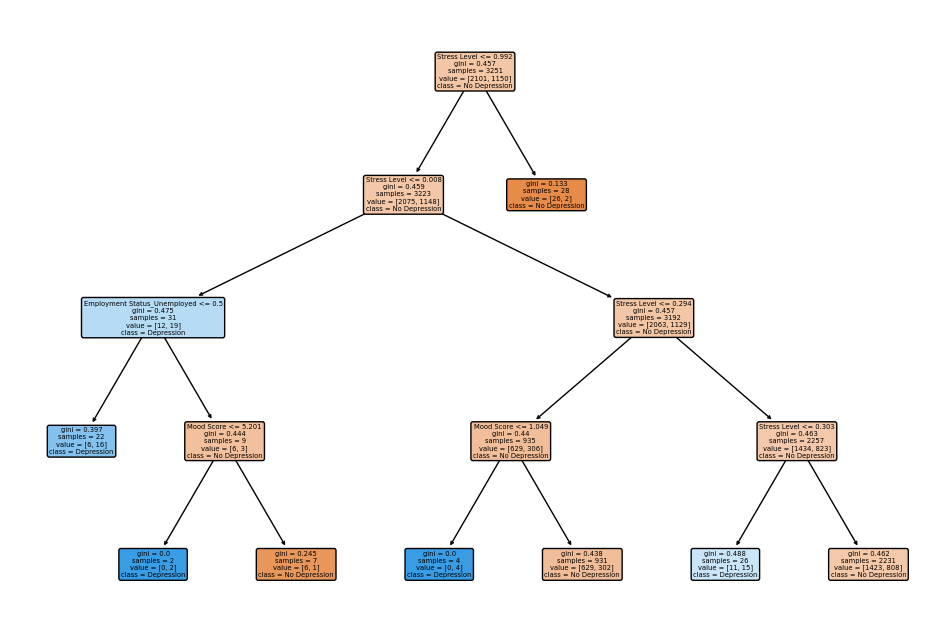

In [108]:
plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=X_encoded.columns, class_names=['No Depression', 'Depression'], filled=True, rounded=True)
plt.show()

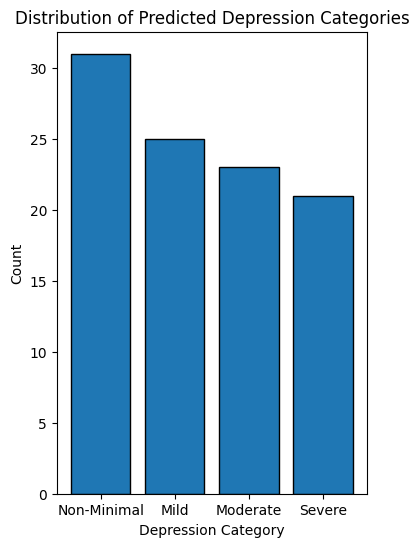

In [109]:
#Creating custom categories based on predicted probabilities
custom_categories = np.random.choice(['Non-Minimal', 'Mild', 'Moderate', 'Severe'], size=100)

# Defining the bin edges and adjusting the number of bins as needed
bins = np.arange(5) - 0.5  

plt.figure(figsize=(4, 6))
plt.hist(custom_categories, bins=bins, rwidth=0.8, align='mid', edgecolor='black')
plt.xlabel('Depression Category')
plt.ylabel('Count')
plt.title('Distribution of Predicted Depression Categories')
plt.xticks(range(4), ['Non-Minimal', 'Mild', 'Moderate', 'Severe'])
plt.show()
